# Self Organizing Maps

## Setup and Context

### Introduction

A Self Organizing Map (SOM) is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher-dimensional data set while preserving the topological structure of the data. 

Imagine you have a grid, and each point on this grid represents a neuron in the SOM. Initially, the SOM is unorganized, with random values assigned to each neuron.

During the learning process, SOMs adjust these neuron values to better represent the input data. Here's where the magic happens: instead of having explicit rules for learning like other neural networks, SOMs learn through competition and cooperation. When presented with an input, the neuron closest to the input becomes the **winning node** and it and its neighboring neurons adjust their values to better represent that input. This process is repeated for each input, gradually organizing the neurons into clusters that capture the structure of the input data.

After training, the SOM forms a low-dimensional map of the input space, where similar inputs are mapped close to each other on the grid. This makes SOMs powerful tools for data visualization and exploratory data analysis. They can uncover patterns and relationships in complex data sets, aiding in tasks like clustering, classification, and dimensionality reduction. Moreover, SOMs are inherently robust to noise and can handle high-dimensional data efficiently, making them versatile tools in various fields such as data mining, pattern recognition, and even in modeling biological neural networks.

The following is an example of a Self Organizing Map.

### Import Statements

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

import pylab

## Data Preprocessing

### Load the Data

The dataset used is a cleaned version of the [UCI Credit Card Approval Dataset](https://archive.ics.uci.edu/dataset/27/credit+approval). Due to confidentiality issues, background information about the data is not provided.

In [35]:
dataset = pd.read_csv("./data/Credit_Card_Applications.csv")

In [36]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


The purpose of this Self Organizing Map is to identify frauds.

Potential frauds here are assumed to be **outliers**. So with this context, potential frauds are the outlying neurons in our two dimensional Self Organizing Map. To detect the outlying neurons we use the **Mean Interneuron Distance (MID)**. The Mean Interneuron Distance measures the average distance between a neuron and its neighbors on the SOM grid. A lower MID indicates denser clustering, reflecting better organization of the input data. So if the MID is high, the node can be consider for fraud. Then, we use an **inverse mapping function** to find out which customers originally in the input, are associated with the winning node, that is an outlier.

### Splitting the Dataset into two Subsets

We want to split the dataset into two subsets: One containing all the variables from CustomerID to Attribute 14 and the other containing the Class column (0 means the application was rejected and 1 means the application was approved).We are doing this so that we can clearly distinguish between customers who were approved and customers who were rejected on the Self Organizing Map.

If you notice, we included the CustomerID. By including the customerID, it becomes easier to track individual customers within the SOM.

In [37]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Even though we spilt the data into X and y, we are not doing it to train our model. Remember that, this is an Unsupervised Machine Learning technique. We are doing this only to identify approved and rejected customers. The dependent variable is not included in the training process.

### Feature Scaling

Feature scaling is almost always compulsory in Deep Learning. Here we will be using Normalization.

In [38]:
sc = MinMaxScaler(feature_range=(0, 1))

X = sc.fit_transform(X)

## Building the SOM

### Initializing the SOM

We are going to use a numpy based implementation of an Self Organizing Map called [minisom](https://github.com/JustGlowing/minisom). With this, we create a `MiniSom` class and initialize the dimensions of our SOM map `x` and `y`, the number of features in the input data, `input_len`, the radius of the different neighborhoods in the grid, `sigma` and the learning rate, `learning_rate`.

In [59]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.1)

Next we initialize the weights of our SOM.

In [60]:
som.random_weights_init(X)

### Training the SOM

Now we train the SOM.

In [61]:
som.train_random(X, num_iteration=100)

## Identifying the Outliers

### Visualizing the SOM

Let us see a visual representation of our SOM. We are putting the different winning nodes on the map. The different colors correspond to the different range values of the Mean Interneuron Distances.

We also want to see where all the approved and rejected customers fit on the SOM.

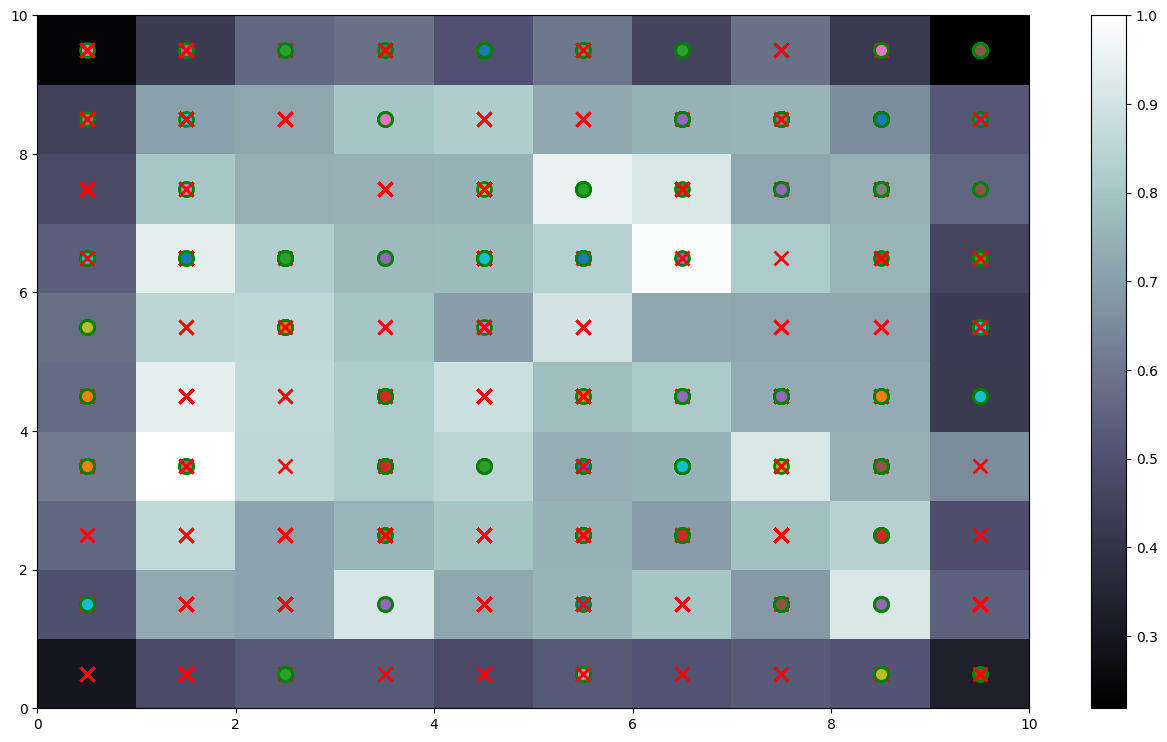

In [62]:
plt.figure(figsize=(16, 9))

pylab.bone()

pylab.pcolor(som.distance_map().T)
pylab.colorbar()

# "x" represent rejected customers and "o" represents approved customers
markers = ["x", "o"]
colors = ["r", "g"]

for i, x in enumerate(X):
    w = som.winner(x)
    pylab.plot(w[0] + 0.5, w[1] + 0.5, 
               markers[y[i]], 
               markeredgecolor=colors[y[i]],
               markerfacecolor=None,
               markersize=10,
               markeredgewidth=2)
    
pylab.show()

### Finding the Individual Outliers

Firstly we get the mapping of of the winning nodes to the customers.

In [66]:
mappings = som.win_map(X)

In [68]:
frauds = mappings[(8, 1)]

frauds

[array([0.74163193, 1.        , 0.53759398, 0.27089286, 0.5       ,
        0.15384615, 0.5       , 0.26614035, 1.        , 1.        ,
        0.2238806 , 1.        , 0.5       , 0.        , 0.05      ]),
 array([0.64988848, 1.        , 0.69669173, 0.51785714, 0.5       ,
        0.        , 0.        , 0.63157895, 1.        , 1.        ,
        0.2238806 , 1.        , 0.5       , 0.        , 0.01      ]),
 array([0.49475231, 1.        , 0.61398496, 0.33625   , 0.5       ,
        0.        , 0.        , 0.50578947, 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.015     , 0.003     ]),
 array([0.56333065, 1.        , 0.64406015, 0.66071429, 0.5       ,
        0.07692308, 0.5       , 0.52631579, 1.        , 1.        ,
        0.25373134, 1.        , 0.5       , 0.        , 0.        ])]